In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import numpy as np

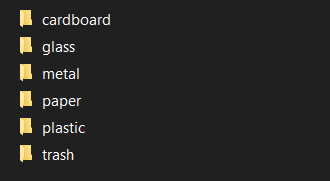

In [ ]:
m = load_model("models/g_model2.h5")

In [ ]:
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

LABELS = ["blue", "green", "yellow", "blue", "yellow", "black"]
TRASH = [i for i in os.listdir(os.getcwd() + "\\images\\colours")]

DIR = os.getcwd() + "\\images\\colours"

In [53]:
def prepare_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img1 = image.img_to_array(img) / 255
#     img1 = preprocess_input(img1)
    img1 = np.expand_dims(img1, axis=0)
    return img1, img 

In [59]:
img_arr, label_arr = [], []

for img_p in os.listdir(DIR):
    img_path = os.path.join(DIR, img_p)
    img, img2 = prepare_img(img_path)

    prediction = m.predict(img)
    img_arr.append(img2)
    p = np.argmax(prediction[0])
    label = f"{LABELS[p]}, ({TRASH[p]})"
    label_arr.append(label)

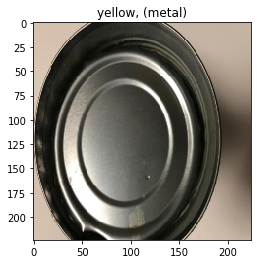

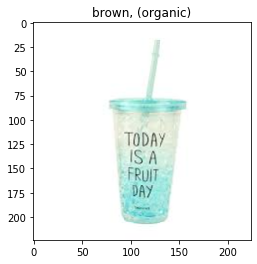

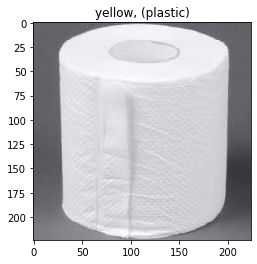

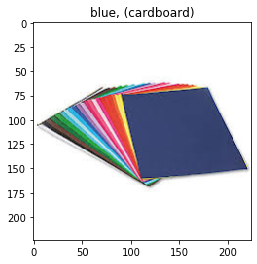

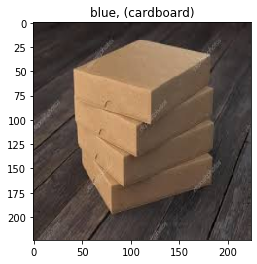

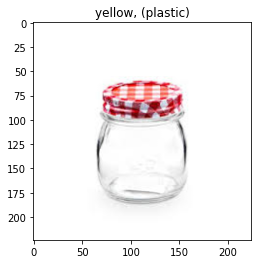

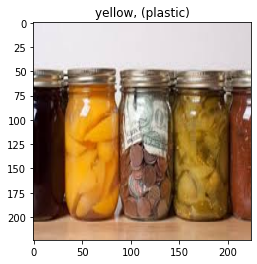

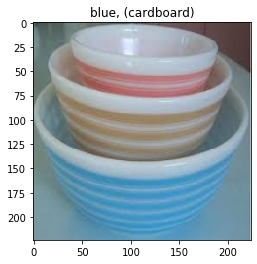

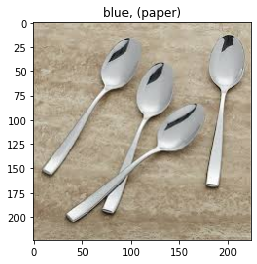

In [60]:
for i in range(len(img_arr)):
    img = img_arr[i]
    label = label_arr[i]
    plt.title(label)
    plt.imshow(img)
    plt.show()

In [ ]:
fig = plt.figure()
ax